In [1]:
import os

base_path = '/kaggle/input/prepro-augent/pro+aug'
print("Classes (folders):", os.listdir(base_path))

Classes (folders): ['im_Parabasal', 'im_Dyskeratotic', 'im_Metaplastic', 'im_Superficial-Intermediate', 'im_Koilocytotic']


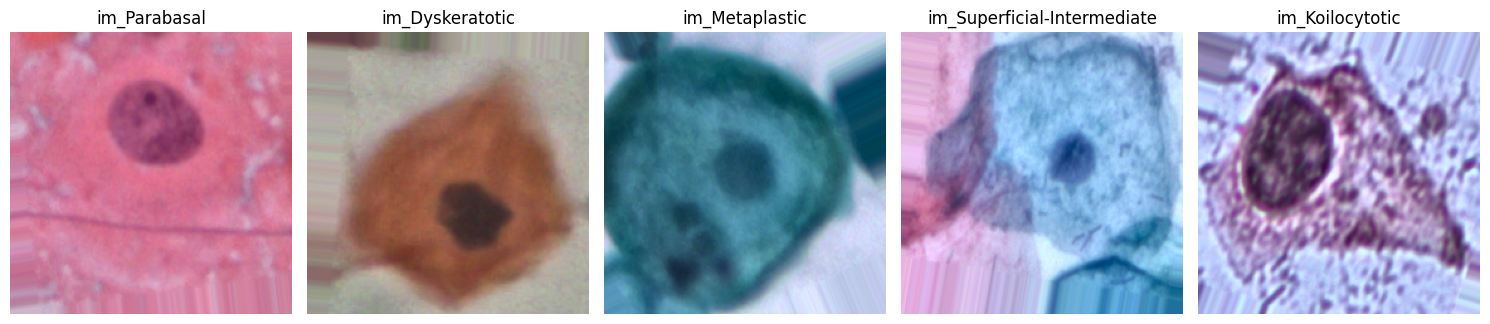

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

augmented_dir = '/kaggle/input/pro-aug/preprocessed_cells_augmented'
IMG_SIZE = (224, 224)

plt.figure(figsize=(15, 8))
class_names = os.listdir(augmented_dir)

for i, class_name in enumerate(class_names):
    class_path = os.path.join(augmented_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    for fname in os.listdir(class_path):
        if fname.startswith('aug_') and fname.endswith(('.bmp', '.jpg', '.png')):
            img_path = os.path.join(class_path, fname)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(class_names), i+1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            break  # Show only 1 image per class

plt.tight_layout()
plt.show()


In [5]:
import os

dataset_dir = '/kaggle/input/prepro-augent/pro+aug'

total_images = 0
class_counts = {}

# Loop through each class folder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.bmp', '.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = num_images
        total_images += num_images

# 📊 Print counts
print("📌 Image count per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\n✅ Total images in dataset: {total_images}")


📌 Image count per class:
im_Parabasal: 4746
im_Dyskeratotic: 4878
im_Metaplastic: 4758
im_Superficial-Intermediate: 4986
im_Koilocytotic: 4950

✅ Total images in dataset: 24318


# **Subset Create**

In [1]:
import os
import shutil
from tqdm import tqdm

# Paths
original_dir = "/kaggle/input/prepro-augent/pro+aug"
subset_dir = "/kaggle/working/dataset_subset"
os.makedirs(subset_dir, exist_ok=True)

# Number of images per class to copy
images_per_class = 800

# Loop through each class folder in original dataset
for class_name in os.listdir(original_dir):
    class_src = os.path.join(original_dir, class_name)
    class_dst = os.path.join(subset_dir, class_name)
    os.makedirs(class_dst, exist_ok=True)

    # Collect all image filenames
    images = [f for f in os.listdir(class_src) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Select first N images
    selected_images = images[:images_per_class]

    # Copy files
    for img_name in tqdm(selected_images, desc=f"Copying {class_name}"):
        src_path = os.path.join(class_src, img_name)
        dst_path = os.path.join(class_dst, img_name)
        shutil.copy2(src_path, dst_path)  # ✅ copy actual file

print("✅ Subset dataset created at:", subset_dir)


Copying im_Koilocytotic: 100%|██████████| 800/800 [00:08<00:00, 95.58it/s] 

✅ Subset dataset created at: /kaggle/working/dataset_subset


In [7]:
# Directory where your subset augmented images are stored
subset_dir = "/kaggle/working/dataset_subset"

total_subset_images = 0

# Loop through each class folder in the subset directory
for class_name in os.listdir(subset_dir):
    class_path = os.path.join(subset_dir, class_name)
    if os.path.isdir(class_path):
        # Count images in the class folder
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.bmp'))])
        print(f"{class_name}: {num_images} images")
        total_subset_images += num_images

print(f"\nTotal images in the subset dataset: {total_subset_images}")

im_Dyskeratotic: 800 images
im_Superficial-Intermediate: 800 images
im_Koilocytotic: 800 images
im_Metaplastic: 800 images
im_Parabasal: 800 images

Total images in the subset dataset: 4000


# Base CNN

📁 Using dataset from: /kaggle/working/dataset_subset
📁 Dataset exists: True
🏷️ Available classes: ['im_Metaplastic', 'im_Koilocytotic', 'im_Parabasal', 'im_Superficial-Intermediate', 'im_Dyskeratotic']
   • im_Metaplastic: 0 images
   • im_Koilocytotic: 0 images
   • im_Parabasal: 0 images
   • im_Superficial-Intermediate: 0 images
   • im_Dyskeratotic: 0 images

🔄 Creating data generators...
Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
✅ Training samples: 3200
✅ Validation samples: 800
✅ Number of classes: 5

🚀 Starting model training...

📋 Model Architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 391ms/step - accuracy: 0.4202 - loss: 1.3584 - val_accuracy: 0.6488 - val_loss: 0.8941 - learning_rate: 5.0000e-04
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.6584 - loss: 0.9318 - val_accuracy: 0.7750 - val_loss: 0.6282 - learning_rate: 5.0000e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.7291 - loss: 0.7710 - val_accuracy: 0.7763 - val_loss: 0.6236 - learning_rate: 5.0000e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.7788 - loss: 0.6255 - val_accuracy: 0.8037 - val_loss: 0.5591 - learning_rate: 5.0000e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.7915 - loss: 0.5791 - val_accuracy: 0.8138 - val_loss: 0.5064 - learning_rate: 5.0000e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.8167 - loss: 0.5361 - val_accuracy: 0.8000 - val_loss: 0.6130 - learning_rate: 5.0000e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 38

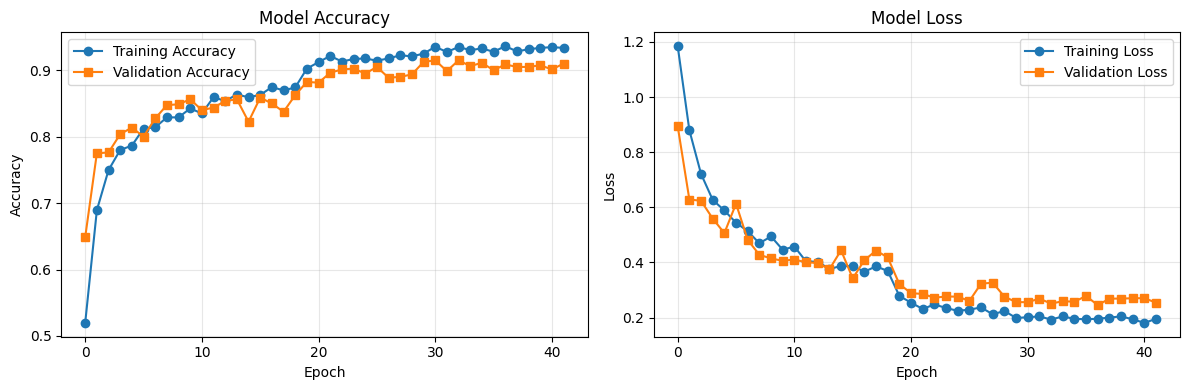

✅ Training plots saved at: /kaggle/working/training_plots.png

📦 Creating output archive...
✅ All outputs archived in: /kaggle/working/cnn_model_outputs.zip

📁 Output Files:
   • cnn_subset_model1_tf.keras: 127.87 MB
   • cnn_training_history.pkl: 0.00 MB
   • training_summary.txt: 0.00 MB
   • training_plots.png: 0.18 MB
   • cnn_model_outputs.zip: 128.06 MB

🎯 Training completed! Download 'cnn_model_outputs.zip' from Kaggle output section.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import zipfile
import shutil
import os

# 📁 Kaggle Dataset paths (modify according to your dataset)
# Option 1: If dataset is uploaded as Kaggle dataset
train_dir = '/kaggle/working/dataset_subset'

# Option 2: If dataset is in working directory
# train_dir = '/kaggle/working/subset_cells_augmented'

# Option 3: If you need to extract from zip
# zip_path = '/kaggle/input/your-dataset-name/subset_cells_augmented.zip'
# extract_dir = '/kaggle/working/subset_cells_augmented'
# 
# if not os.path.exists(extract_dir):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall('/kaggle/working/')
# 
# train_dir = extract_dir

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print(f"📁 Using dataset from: {train_dir}")
print(f"📁 Dataset exists: {os.path.exists(train_dir)}")

# List available classes
if os.path.exists(train_dir):
    classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
    print(f"🏷️ Available classes: {classes}")
    for cls in classes:
        cls_path = os.path.join(train_dir, cls)
        num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"   • {cls}: {num_images} images")

# Create ImageDataGenerator with validation_split
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Create train and validation generators
print("\n🔄 Creating data generators...")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"✅ Training samples: {train_generator.samples}")
print(f"✅ Validation samples: {val_generator.samples}")
print(f"✅ Number of classes: {train_generator.num_classes}")

# Define CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
print("\n🚀 Starting model training...")
model = create_cnn_model()

# Print model summary
print("\n📋 Model Architecture:")
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # You can reduce this for faster testing
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Save model and history in Kaggle working directory
print("\n💾 Saving model and training history...")

# Save model (Kaggle working directory)
model_save_path = '/kaggle/working/cnn_subset_model1_tf.keras'
model.save(model_save_path)
print(f"✅ Model saved at: {model_save_path}")

# Save training history
history_save_path = '/kaggle/working/cnn_training_history.pkl'
with open(history_save_path, 'wb') as f:
    pickle.dump(history.history, f)
print(f"✅ Training history saved at: {history_save_path}")

# Save training summary
summary_path = '/kaggle/working/training_summary.txt'
with open(summary_path, 'w') as f:
    f.write("CNN Model Training Summary\n")
    f.write("=" * 30 + "\n\n")
    f.write(f"Training samples: {train_generator.samples}\n")
    f.write(f"Validation samples: {val_generator.samples}\n")
    f.write(f"Number of classes: {train_generator.num_classes}\n")
    f.write(f"Class indices: {train_generator.class_indices}\n")
    f.write(f"Image size: {IMG_SIZE}\n")
    f.write(f"Batch size: {BATCH_SIZE}\n")
    f.write(f"Total epochs trained: {len(history.history['loss'])}\n")
    f.write(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}\n")
    f.write(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}\n")
    f.write(f"Final training loss: {history.history['loss'][-1]:.4f}\n")
    f.write(f"Final validation loss: {history.history['val_loss'][-1]:.4f}\n")

print(f"✅ Training summary saved at: {summary_path}")

# Quick evaluation
print("\n📊 Final Training Results:")
print(f"   • Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"   • Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"   • Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"   • Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/training_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Training plots saved at: /kaggle/working/training_plots.png")

# Create a zip file with all outputs for easy download
print("\n📦 Creating output archive...")
with zipfile.ZipFile('/kaggle/working/cnn_model_outputs.zip', 'w') as zipf:
    zipf.write(model_save_path, 'cnn_subset_model1_tf.keras')
    zipf.write(history_save_path, 'cnn_training_history.pkl')
    zipf.write(summary_path, 'training_summary.txt')
    zipf.write('/kaggle/working/training_plots.png', 'training_plots.png')

print("✅ All outputs archived in: /kaggle/working/cnn_model_outputs.zip")

# Print file sizes
print("\n📁 Output Files:")
for filename in [model_save_path, history_save_path, summary_path, '/kaggle/working/training_plots.png', '/kaggle/working/cnn_model_outputs.zip']:
    if os.path.exists(filename):
        size_mb = os.path.getsize(filename) / (1024 * 1024)
        print(f"   • {os.path.basename(filename)}: {size_mb:.2f} MB")

print("\n🎯 Training completed! Download 'cnn_model_outputs.zip' from Kaggle output section.")

🔄 Setting up data generators and loading model...
Found 800 images belonging to 5 classes.
✅ Validation generator created with 800 samples
✅ Model loaded successfully from /kaggle/working/cnn_subset_model1_tf.keras

🔄 Evaluating the loaded model on the validation set:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📊 Model Performance:
   • Validation Accuracy: 0.9237 (92.37%)
   • Validation Loss: 0.2381

🔍 Generating predictions...
📋 Classes found: ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
📊 Total validation samples: 800

📋 CLASSIFICATION REPORT
                             precision    recall  f1-score   support

            im_Dyskeratotic       0.96      0.98      0.97       160
            im_Koilocytotic       0.92      0.82      0.87       160
             im_Metaplastic       0.87      0.93      0.90       160
               im_Parabasal       0.96      0.99      0.98       160
im_Superficial-Intermediate       0.92      0.89      0.91       160

                   accuracy                           0.92       800
                  macro avg       0.92      0.92      0.92       800
               weighted avg       0.92      0.92      0.92       800



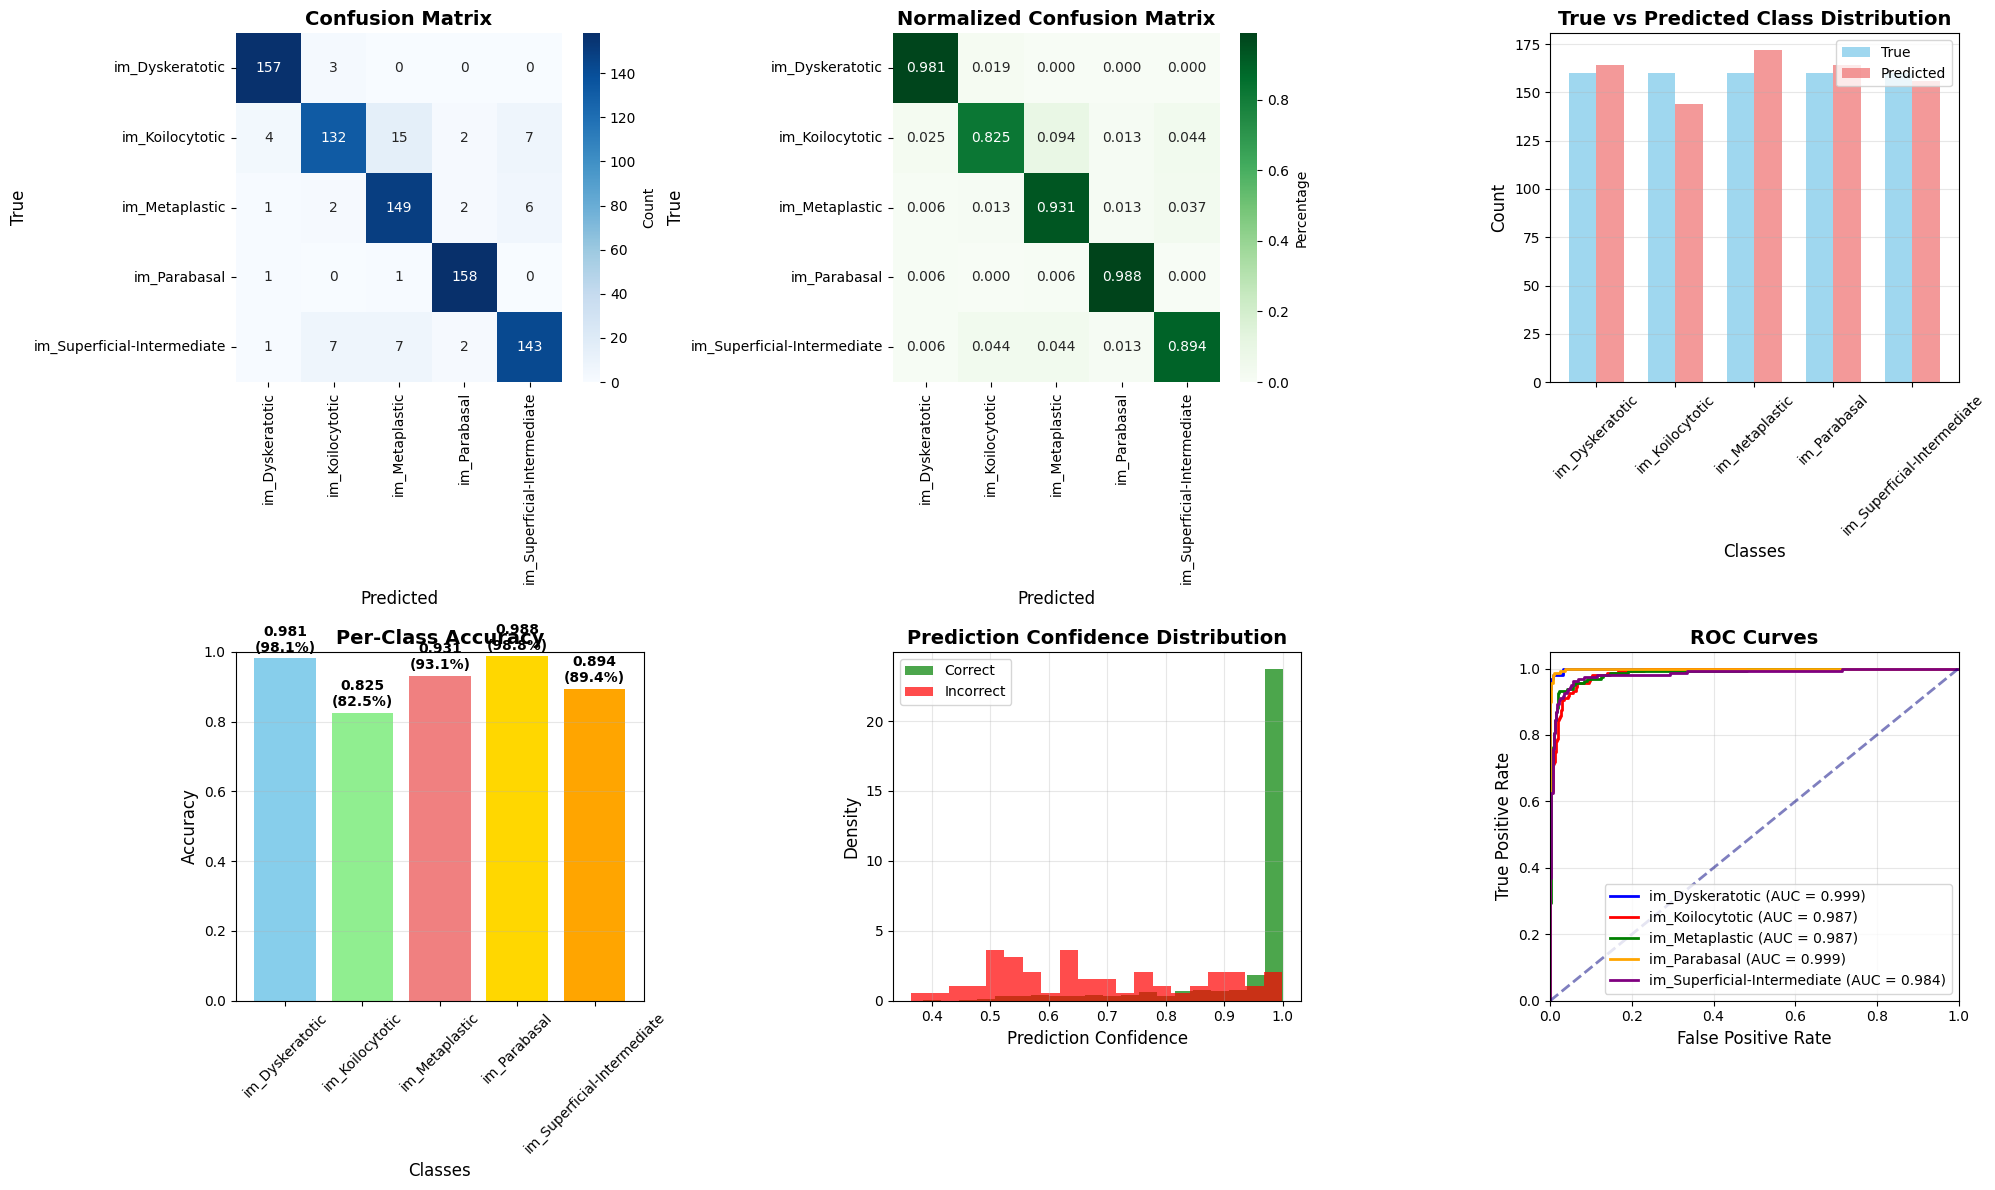


📊 DETAILED METRICS PER CLASS
                      Class  TP  TN  FP  FN Precision Recall F1-Score Specificity
            im_Dyskeratotic 157 633   7   3    0.9573 0.9812   0.9691      0.9891
            im_Koilocytotic 132 628  12  28    0.9167 0.8250   0.8684      0.9812
             im_Metaplastic 149 617  23  11    0.8663 0.9313   0.8976      0.9641
               im_Parabasal 158 634   6   2    0.9634 0.9875   0.9753      0.9906
im_Superficial-Intermediate 143 627  13  17    0.9167 0.8938   0.9051      0.9797

🎯 OVERALL MODEL STATISTICS
Overall Accuracy: 0.9237 (92.37%)
Overall Loss: 0.2381
Total Samples: 800
Correct Predictions: 739
Incorrect Predictions: 61

Prediction Confidence Statistics:
   • Mean Confidence: 0.9226
   • Median Confidence: 0.9964
   • Min Confidence: 0.3657
   • Max Confidence: 1.0000

⚠️  Low Confidence Predictions (< 0.7):
   • Count: 94
   • Percentage: 11.75%
   • Accuracy of low confidence predictions: 60.64%

✅ Model evaluation completed!


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# =============================================================================
# STEP 1: LOAD MODEL AND SETUP DATA GENERATORS
# =============================================================================

# Define paths (modify according to your setup)
model_path = '/kaggle/working/cnn_subset_model1_tf.keras'  # Your model path
train_dir = '/kaggle/working/dataset_subset'  # Your data directory
IMG_SIZE = (224, 224)

print("🔄 Setting up data generators and loading model...")

# Define ImageDataGenerator for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create validation generator
val_gen = datagen.flow_from_directory(
    train_dir, 
    target_size=IMG_SIZE, 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation', 
    shuffle=False
)

print(f"✅ Validation generator created with {val_gen.samples} samples")

# Load the saved model
try:
    loaded_model = tf.keras.models.load_model(model_path)
    print(f"✅ Model loaded successfully from {model_path}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please check your model path and try again.")
    exit()

# =============================================================================
# STEP 2: MODEL EVALUATION
# =============================================================================

# Evaluate the loaded model on the validation set
print("\n🔄 Evaluating the loaded model on the validation set:")
val_loss, val_accuracy = loaded_model.evaluate(val_gen, verbose=0)
print(f"\n📊 Model Performance:")
print(f"   • Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   • Validation Loss: {val_loss:.4f}")

# Get the true labels and predicted labels for the validation set
print("\n🔍 Generating predictions...")
val_gen.reset()  # Ensure the generator starts from the beginning
y_pred_probs = loaded_model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class names
class_names = list(val_gen.class_indices.keys())
print(f"📋 Classes found: {class_names}")
print(f"📊 Total validation samples: {len(y_true)}")

# Print classification report
print("\n" + "="*50)
print("📋 CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_names))

# =============================================================================
# STEP 3: COMPREHENSIVE VISUALIZATION
# =============================================================================

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# 2. Normalized Confusion Matrix
plt.subplot(2, 3, 2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.3f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')

# 3. Class Distribution
plt.subplot(2, 3, 3)
unique_true, counts_true = np.unique(y_true, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

# Ensure all classes are represented
all_counts_true = np.zeros(len(class_names))
all_counts_pred = np.zeros(len(class_names))

for i, count in zip(unique_true, counts_true):
    all_counts_true[i] = count
    
for i, count in zip(unique_pred, counts_pred):
    all_counts_pred[i] = count

x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, all_counts_true, width, label='True', alpha=0.8, color='skyblue')
plt.bar(x + width/2, all_counts_pred, width, label='Predicted', alpha=0.8, color='lightcoral')

plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('True vs Predicted Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 4. Per-class Accuracy
plt.subplot(2, 3, 4)
class_accuracies = []
for i in range(len(class_names)):
    class_mask = (y_true == i)
    if np.sum(class_mask) > 0:
        class_acc = np.sum((y_true == i) & (y_pred == i)) / np.sum(class_mask)
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange'][:len(class_names)]
bars = plt.bar(class_names, class_accuracies, color=colors)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Class Accuracy', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for bar, acc in zip(bars, class_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

# 5. Prediction Confidence Distribution
plt.subplot(2, 3, 5)
max_probs = np.max(y_pred_probs, axis=1)
correct_mask = (y_true == y_pred)

plt.hist(max_probs[correct_mask], bins=20, alpha=0.7, label='Correct', color='green', density=True)
plt.hist(max_probs[~correct_mask], bins=20, alpha=0.7, label='Incorrect', color='red', density=True)
plt.xlabel('Prediction Confidence', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 6. ROC Curves (for multi-class)
plt.subplot(2, 3, 6)
if len(class_names) == 2:
    # Binary classification ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
else:
    # Multi-class ROC
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    for i in range(len(class_names)):
        if i < len(colors):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=colors[i], lw=2, 
                    label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# STEP 4: DETAILED METRICS
# =============================================================================

# Detailed metrics table
print("\n" + "="*70)
print("📊 DETAILED METRICS PER CLASS")
print("="*70)

metrics_data = []
for i, class_name in enumerate(class_names):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fp + fn)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    metrics_data.append({
        'Class': class_name,
        'TP': tp,
        'TN': tn, 
        'FP': fp,
        'FN': fn,
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'Specificity': f'{specificity:.4f}'
    })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))

# Overall model statistics
print(f"\n" + "="*50)
print("🎯 OVERALL MODEL STATISTICS")
print("="*50)
print(f"Overall Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"Overall Loss: {val_loss:.4f}")
print(f"Total Samples: {len(y_true)}")
print(f"Correct Predictions: {np.sum(y_true == y_pred)}")
print(f"Incorrect Predictions: {np.sum(y_true != y_pred)}")

# Confidence statistics
print(f"\nPrediction Confidence Statistics:")
print(f"   • Mean Confidence: {np.mean(max_probs):.4f}")
print(f"   • Median Confidence: {np.median(max_probs):.4f}")
print(f"   • Min Confidence: {np.min(max_probs):.4f}")
print(f"   • Max Confidence: {np.max(max_probs):.4f}")

# Low confidence predictions
low_conf_threshold = 0.7
low_conf_mask = max_probs < low_conf_threshold
if np.sum(low_conf_mask) > 0:
    print(f"\n⚠️  Low Confidence Predictions (< {low_conf_threshold}):")
    print(f"   • Count: {np.sum(low_conf_mask)}")
    print(f"   • Percentage: {np.sum(low_conf_mask)/len(max_probs)*100:.2f}%")
    print(f"   • Accuracy of low confidence predictions: {np.sum(correct_mask[low_conf_mask])/np.sum(low_conf_mask)*100:.2f}%")

print("\n✅ Model evaluation completed!")

In [2]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Hyper Parameter Tunned CNN

In [9]:
!pip install keras-tuner --quiet

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import pandas as pd
import os

# =========================
# Dataset Path
# =========================
train_dir = '/kaggle/working/dataset_subset'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# =========================
# Data Generators
# =========================
def get_data_generators(batch_size=BATCH_SIZE):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=25,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        validation_split=0.2
    )
    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )
    val_gen = datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )
    return train_gen, val_gen

train_generator, val_generator = get_data_generators()

# =========================
# Model Builder
# =========================
def build_model(hp):
    dropout_rate = hp.Choice('dropout_rate', values=[0.5, 0.7])
    activation_func = hp.Choice('activation', values=['relu', 'tanh'])
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0001, 0.01])
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    batch_size = hp.Choice('batch_size', values=[16, 32])
    kernel_size = hp.Choice('kernel_size', values=[3, 5])

    model = Sequential([
        Conv2D(32, (kernel_size, kernel_size), activation=activation_func, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (kernel_size, kernel_size), activation=activation_func),
        MaxPooling2D(2,2),
        Conv2D(128, (kernel_size, kernel_size), activation=activation_func),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512, activation=activation_func),  # fixed 512 units
        Dropout(dropout_rate),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate) if optimizer_choice=='adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# =========================
# Tuner Setup
# =========================
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Total combinations
    directory='/kaggle/working/hp_tuning',
    project_name='cnn_tuning'
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# =========================
# Run Search
# =========================
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

# =========================
# Collect All Results
# =========================
results = []
for trial in tuner.oracle.get_best_trials(num_trials=36):
    hp = trial.hyperparameters.values
    # Use get_last_value to get the last recorded val_accuracy
    acc = trial.metrics.get_last_value('val_accuracy')
    results.append({**hp, 'val_accuracy': acc})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_accuracy', ascending=False)

print("\n📊 All Hyperparameter Combinations and Validation Accuracies:")
print(results_df)

# Save results
results_df.to_csv("/kaggle/working/hp_tuning_results_for_cnn1.csv", index=False)
print("\n✅ Results saved to /kaggle/working/hp_tuning_results_cnn_1.csv")

# =========================
# Best Hyperparameters
# =========================
best_hp = tuner.get_best_hyperparameters(1)[0]
print("\n🏆 Best Hyperparameters Found:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

# =========================
# Train Final Model with Best Params
# =========================
final_model = build_model(best_hp)
history = final_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

final_acc = history.history['val_accuracy'][-1]
print(f"\n🎯 Final Model Validation Accuracy: {final_acc:.4f}")

final_model.save('/kaggle/working/cnn_best_model_1.keras')


Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
Reloading Tuner from /kaggle/working/hp_tuning/cnn_tuning/tuner0.json

📊 All Hyperparameter Combinations and Validation Accuracies:
   dropout_rate activation  learning_rate optimizer  batch_size  kernel_size  \
0           0.5       relu         0.0001      adam          16            3   
1           0.5       relu         0.0010      adam          32            3   
2           0.5       relu         0.0010   rmsprop          16            3   
3           0.5       relu         0.0010      adam          16            5   
4           0.5       relu         0.0010      adam          16            3   
5           0.5       relu         0.0010   rmsprop          32            5   
6           0.5       relu         0.0010   rmsprop          32            3   
7           0.5       relu         0.0001      adam          16            5   
8           0.5       relu         0.0010      adam          32  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 400ms/step - accuracy: 0.4629 - loss: 1.2798 - val_accuracy: 0.7400 - val_loss: 0.7943
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - accuracy: 0.7232 - loss: 0.7889 - val_accuracy: 0.7425 - val_loss: 0.6748
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 392ms/step - accuracy: 0.7745 - loss: 0.6549 - val_accuracy: 0.7950 - val_loss: 0.6081
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 393ms/step - accuracy: 0.7940 - loss: 0.5717 - val_accuracy: 0.8087 - val_loss: 0.5292
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.8255 - loss: 0.4997 - val_accuracy: 0.8125 - val_loss: 0.4958
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 388ms/step - accuracy: 0.8383 - loss: 0.4557 - val_accuracy: 0.8012 - val_loss: 0.5028
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.8356 - loss: 0.4613 - val_accuracy: 0.8213 - val_loss: 0.4593
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 394ms/step - accuracy: 0.8485 - loss: 0

🔄 Setting up data generators and loading model...
Found 800 images belonging to 5 classes.
✅ Validation generator created with 800 samples
✅ Model loaded successfully from /kaggle/working/cnn_best_model_1.keras
⚠️  Training history file not found at /kaggle/working/training_history.npy
    Training history plots will be skipped.

🔄 Evaluating the loaded model on the validation set:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📊 Model Performance:
   • Validation Accuracy: 0.9050 (90.50%)
   • Validation Loss: 0.2541

🔍 Generating predictions...
📋 Classes found: ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
📊 Total validation samples: 800

📋 CLASSIFICATION REPORT
                             precision    recall  f1-score   support

            im_Dyskeratotic       0.97      0.97      0.97       160
            im_Koilocytotic       0.90      0.84      0.87       160
             im_Metaplastic       0.84      0.85      0.85       160
               im_Parabasal       0.96      0.94      0.95       160
im_Superficial-Intermediate       0.85      0.93      0.89       160

                   accuracy                           0.91       800
                  macro avg       0.91      0.91      0.91       800
               weighted avg       0.91      0.91      0.91       800



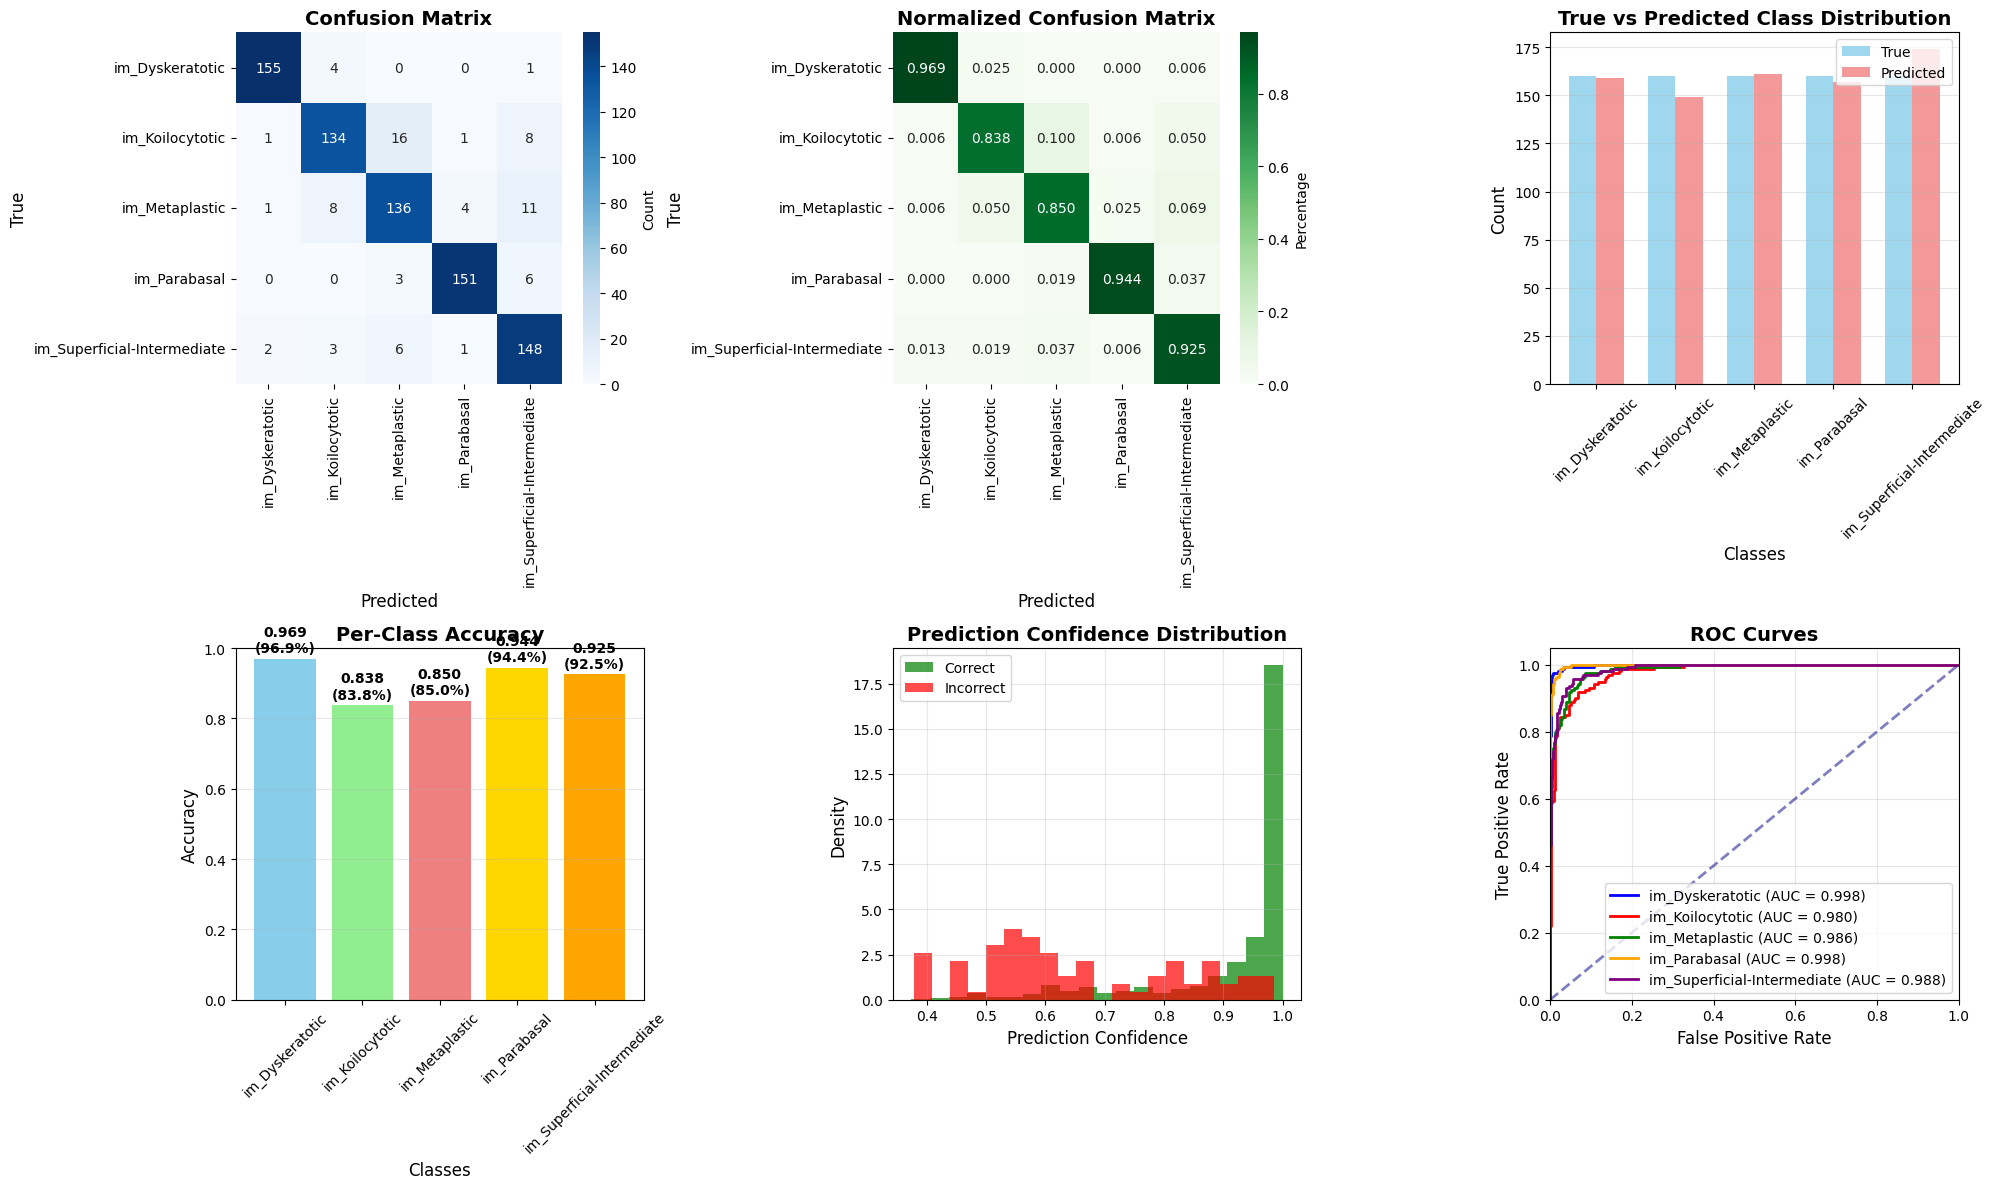


📊 DETAILED METRICS PER CLASS
                      Class  TP  TN  FP  FN Precision Recall F1-Score Specificity
            im_Dyskeratotic 155 636   4   5    0.9748 0.9688   0.9718      0.9938
            im_Koilocytotic 134 625  15  26    0.8993 0.8375   0.8673      0.9766
             im_Metaplastic 136 615  25  24    0.8447 0.8500   0.8474      0.9609
               im_Parabasal 151 634   6   9    0.9618 0.9437   0.9527      0.9906
im_Superficial-Intermediate 148 614  26  12    0.8506 0.9250   0.8862      0.9594

🎯 OVERALL MODEL STATISTICS
Overall Accuracy: 0.9050 (90.50%)
Overall Loss: 0.2541
Total Samples: 800
Correct Predictions: 724
Incorrect Predictions: 76

Prediction Confidence Statistics:
   • Mean Confidence: 0.8916
   • Median Confidence: 0.9741
   • Min Confidence: 0.3744
   • Max Confidence: 1.0000

⚠️  Low Confidence Predictions (< 0.7):
   • Count: 126
   • Percentage: 15.75%
   • Accuracy of low confidence predictions: 60.32%

✅ Model evaluation completed!


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# =============================================================================
# STEP 1: LOAD MODEL AND SETUP DATA GENERATORS
# =============================================================================

# Define paths (modify according to your setup)
model_path = '/kaggle/working/cnn_best_model_1.keras'  # Your model path
train_dir = '/kaggle/working/dataset_subset'  # Your data directory
history_path = '/kaggle/working/training_history.npy'  # Path to saved training history (optional)
IMG_SIZE = (224, 224)

print("🔄 Setting up data generators and loading model...")

# Define ImageDataGenerator for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create validation generator
val_gen = datagen.flow_from_directory(
    train_dir, 
    target_size=IMG_SIZE, 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation', 
    shuffle=False
)

print(f"✅ Validation generator created with {val_gen.samples} samples")

# Load the saved model
try:
    loaded_model = tf.keras.models.load_model(model_path)
    print(f"✅ Model loaded successfully from {model_path}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please check your model path and try again.")
    exit()

# Load training history if available
history = None
try:
    if os.path.exists(history_path):
        history_dict = np.load(history_path, allow_pickle=True).item()
        print(f"✅ Training history loaded from {history_path}")
        history = type('History', (), {'history': history_dict})()
    else:
        print(f"⚠️  Training history file not found at {history_path}")
        print("    Training history plots will be skipped.")
except Exception as e:
    print(f"⚠️  Could not load training history: {e}")
    print("    Training history plots will be skipped.")

# =============================================================================
# STEP 2: MODEL EVALUATION
# =============================================================================

# Evaluate the loaded model on the validation set
print("\n🔄 Evaluating the loaded model on the validation set:")
val_loss, val_accuracy = loaded_model.evaluate(val_gen, verbose=0)
print(f"\n📊 Model Performance:")
print(f"   • Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   • Validation Loss: {val_loss:.4f}")

# Get the true labels and predicted labels for the validation set
print("\n🔍 Generating predictions...")
val_gen.reset()  # Ensure the generator starts from the beginning
y_pred_probs = loaded_model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class names
class_names = list(val_gen.class_indices.keys())
print(f"📋 Classes found: {class_names}")
print(f"📊 Total validation samples: {len(y_true)}")

# Print classification report
print("\n" + "="*50)
print("📋 CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_names))

# =============================================================================
# STEP 3: TRAINING HISTORY VISUALIZATION (if available)
# =============================================================================

if history is not None:
    print("\n🔄 Plotting training history...")
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/training_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Training history plots saved and displayed!")

# =============================================================================
# STEP 4: COMPREHENSIVE EVALUATION VISUALIZATION
# =============================================================================

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# 2. Normalized Confusion Matrix
plt.subplot(2, 3, 2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.3f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')

# 3. Class Distribution
plt.subplot(2, 3, 3)
unique_true, counts_true = np.unique(y_true, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

# Ensure all classes are represented
all_counts_true = np.zeros(len(class_names))
all_counts_pred = np.zeros(len(class_names))

for i, count in zip(unique_true, counts_true):
    all_counts_true[i] = count
    
for i, count in zip(unique_pred, counts_pred):
    all_counts_pred[i] = count

x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, all_counts_true, width, label='True', alpha=0.8, color='skyblue')
plt.bar(x + width/2, all_counts_pred, width, label='Predicted', alpha=0.8, color='lightcoral')

plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('True vs Predicted Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 4. Per-class Accuracy
plt.subplot(2, 3, 4)
class_accuracies = []
for i in range(len(class_names)):
    class_mask = (y_true == i)
    if np.sum(class_mask) > 0:
        class_acc = np.sum((y_true == i) & (y_pred == i)) / np.sum(class_mask)
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange'][:len(class_names)]
bars = plt.bar(class_names, class_accuracies, color=colors)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Class Accuracy', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for bar, acc in zip(bars, class_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

# 5. Prediction Confidence Distribution
plt.subplot(2, 3, 5)
max_probs = np.max(y_pred_probs, axis=1)
correct_mask = (y_true == y_pred)

plt.hist(max_probs[correct_mask], bins=20, alpha=0.7, label='Correct', color='green', density=True)
plt.hist(max_probs[~correct_mask], bins=20, alpha=0.7, label='Incorrect', color='red', density=True)
plt.xlabel('Prediction Confidence', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 6. ROC Curves (for multi-class)
plt.subplot(2, 3, 6)
if len(class_names) == 2:
    # Binary classification ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
else:
    # Multi-class ROC
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    for i in range(len(class_names)):
        if i < len(colors):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=colors[i], lw=2, 
                    label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# STEP 5: DETAILED METRICS
# =============================================================================

# Detailed metrics table
print("\n" + "="*70)
print("📊 DETAILED METRICS PER CLASS")
print("="*70)

metrics_data = []
for i, class_name in enumerate(class_names):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fp + fn)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    metrics_data.append({
        'Class': class_name,
        'TP': tp,
        'TN': tn, 
        'FP': fp,
        'FN': fn,
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'Specificity': f'{specificity:.4f}'
    })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))

# Overall model statistics
print(f"\n" + "="*50)
print("🎯 OVERALL MODEL STATISTICS")
print("="*50)
print(f"Overall Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"Overall Loss: {val_loss:.4f}")
print(f"Total Samples: {len(y_true)}")
print(f"Correct Predictions: {np.sum(y_true == y_pred)}")
print(f"Incorrect Predictions: {np.sum(y_true != y_pred)}")

# Confidence statistics
print(f"\nPrediction Confidence Statistics:")
print(f"   • Mean Confidence: {np.mean(max_probs):.4f}")
print(f"   • Median Confidence: {np.median(max_probs):.4f}")
print(f"   • Min Confidence: {np.min(max_probs):.4f}")
print(f"   • Max Confidence: {np.max(max_probs):.4f}")

# Low confidence predictions
low_conf_threshold = 0.7
low_conf_mask = max_probs < low_conf_threshold
if np.sum(low_conf_mask) > 0:
    print(f"\n⚠️  Low Confidence Predictions (< {low_conf_threshold}):")
    print(f"   • Count: {np.sum(low_conf_mask)}")
    print(f"   • Percentage: {np.sum(low_conf_mask)/len(max_probs)*100:.2f}%")
    print(f"   • Accuracy of low confidence predictions: {np.sum(correct_mask[low_conf_mask])/np.sum(low_conf_mask)*100:.2f}%")

print("\n✅ Model evaluation completed!")

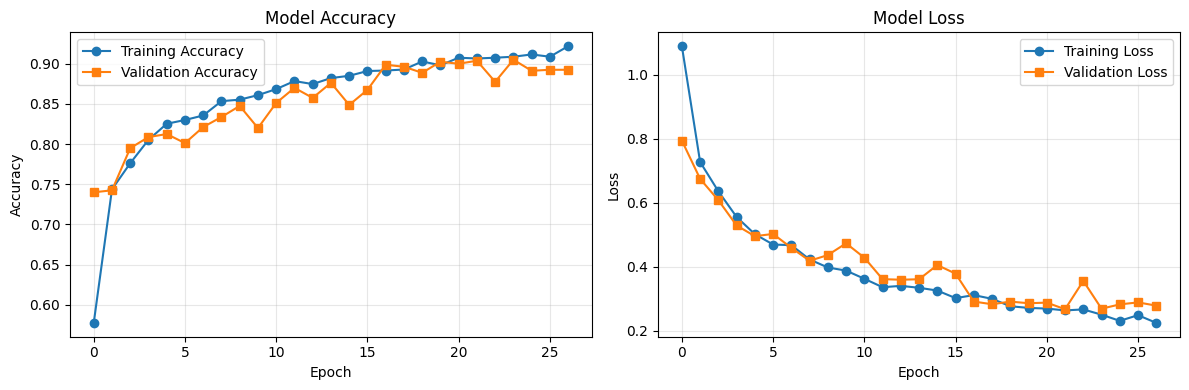

In [20]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(final_model.history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(final_model.history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(final_model.history.history['loss'], label='Training Loss', marker='o')
plt.plot(final_model.history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/training_plots2.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 54.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 74.4 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# QCNN

In [4]:
# ===============================
# IMAGE-BASED QCNN (Keras + PennyLane) — SOLUTION A (FIXED)
# ===============================
import os, math
# --- Keep logs low + turn OFF XLA JIT before importing TF ---
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"

import tensorflow as tf
tf.config.optimizer.set_jit(False)                 # extra safety
tf.config.set_soft_device_placement(True)

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pennylane as qml
from pennylane import numpy as pnp
import numpy as onp

# -----------------------------
# 1) Dataset
# -----------------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 50

train_dir = '/kaggle/working/dataset_subset'  # <-- নিজের ডাটাসেট পাথ দিন

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_gen.class_indices)

# -----------------------------
# 2) Quantum circuit + Custom TF Layer
# -----------------------------
n_qubits = 6
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="tf", diff_method="parameter-shift")
def quantum_circuit(inputs, weights):
    # inputs: shape (n_qubits,)
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)

    # simple entanglement chain
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])

    # trainable rotations
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QuantumLayerTF(tf.keras.layers.Layer):
    def __init__(self, n_qubits, **kwargs):
        super().__init__(**kwargs)
        self.n_qubits = n_qubits

    def build(self, input_shape):
        # Trainable quantum params in float64 to match PennyLane's default
        self.theta = self.add_weight(
            name="weights",
            shape=(self.n_qubits,),
            initializer="random_uniform",
            trainable=True,
            dtype=tf.float64,   # important
        )

    def call(self, inputs):
        # inputs: (batch, n_qubits) -> cast to float64 for QNode
        inputs64 = tf.cast(inputs, tf.float64)
        theta64 = self.theta

        def _single(x):
            # quantum_circuit returns list of float64 scalars
            out = quantum_circuit(x, theta64)       # dtype float64
            return tf.stack(out)                    # (n_qubits,), float64

        # 👉 Run on CPU to avoid XLA_GPU_JIT PyFunc issues
        with tf.device("/CPU:0"):
            y64 = tf.map_fn(
                _single,
                inputs64,
                fn_output_signature=tf.TensorSpec(
                    shape=(self.n_qubits,), dtype=tf.float64
                ),
            )
        # Cast back to float32 so the rest of the Keras model stays in float32
        return tf.cast(y64, tf.float32)

# -----------------------------
# 3) CNN -> Quantum -> Classifier
# -----------------------------
input_img = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.GlobalAveragePooling2D()(x)          # AdaptiveAvgPool2D নেই, তাই GAP

# n_qubits ফিচার -> RY angles ([-π, π])
x = layers.Dense(n_qubits, activation='tanh')(x)
x = layers.Lambda(lambda t: t * math.pi)(x)

# Quantum layer
x = QuantumLayerTF(n_qubits)(x)

# Classifier head
output = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=input_img, outputs=output)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    jit_compile=False   # XLA নিষ্ক্রিয় রাখা হলো
)
model.summary()

# -----------------------------
# 4) Train
# -----------------------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

# -----------------------------
# 5) Save (.keras FILE)
# -----------------------------
save_path = '/kaggle/working/qcnn_image_model_1.keras'  # <-- এটি একটি ফাইল, ডিরেক্টরি নয়
model.save(save_path)
print(f"✅ QCNN image model saved at: {save_path}")

# -----------------------------
# 6) Evaluate + Report
# -----------------------------
val_loss, val_acc = model.evaluate(val_gen)
print(f"\n🎯 Validation Accuracy: {val_acc:.4f}")

from sklearn.metrics import classification_report

y_true = val_gen.classes
y_prob = model.predict(val_gen)
y_pred = onp.argmax(y_prob, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))


2025-08-22 08:23:48.489390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755851028.827934      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755851028.922797      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.


I0000 00:00:1755851052.040470      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755851052.041225      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: name node, interface, outside of any statement?
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ quantum_layer_tf                │ (None, 8)              │             8 │
│ (QuantumLayerTF)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,333 (368.52 KB)

 Trainable params: 94,333 (368.52 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1755851067.306197     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


200/200 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.3474 - loss: 1.4727 - val_accuracy: 0.3750 - val_loss: 1.3372
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 624s 3s/step - accuracy: 0.4912 - loss: 1.2460 - val_accuracy: 0.6212 - val_loss: 1.1611
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.6007 - loss: 1.1058 - val_accuracy: 0.6425 - val_loss: 0.9829
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 621s 3s/step - accuracy: 0.6339 - loss: 1.0149 - val_accuracy: 0.6463 - val_loss: 0.9736
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.6598 - loss: 0.9639 - val_accuracy: 0.6712 - val_loss: 0.9193
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 624s 3s/step - accuracy: 0.7161 - loss: 0.8592 - val_accuracy: 0.6850 - val_loss: 0.8391
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 618s 3s/step - accuracy: 0.7408 - loss: 0.7931 - val_accuracy: 0.6925 - val_loss: 0.8632
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.7114 - loss: 0.8243 - val_accuracy: 0.686

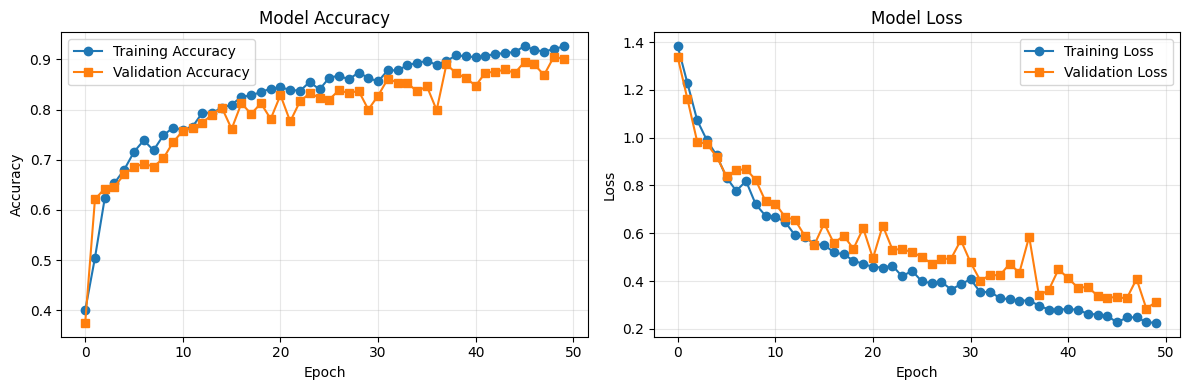

Saved training plot to /kaggle/working/training_plots_3.png


In [7]:
# Plot training history (after training + evaluation)
import matplotlib.pyplot as plt

# 📊 Plotting training and validation history

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/training_plots3.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved training plot to /kaggle/working/training_plots_3.png")

🔄 Predicting on validation set ...
🔄 Evaluating model ...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


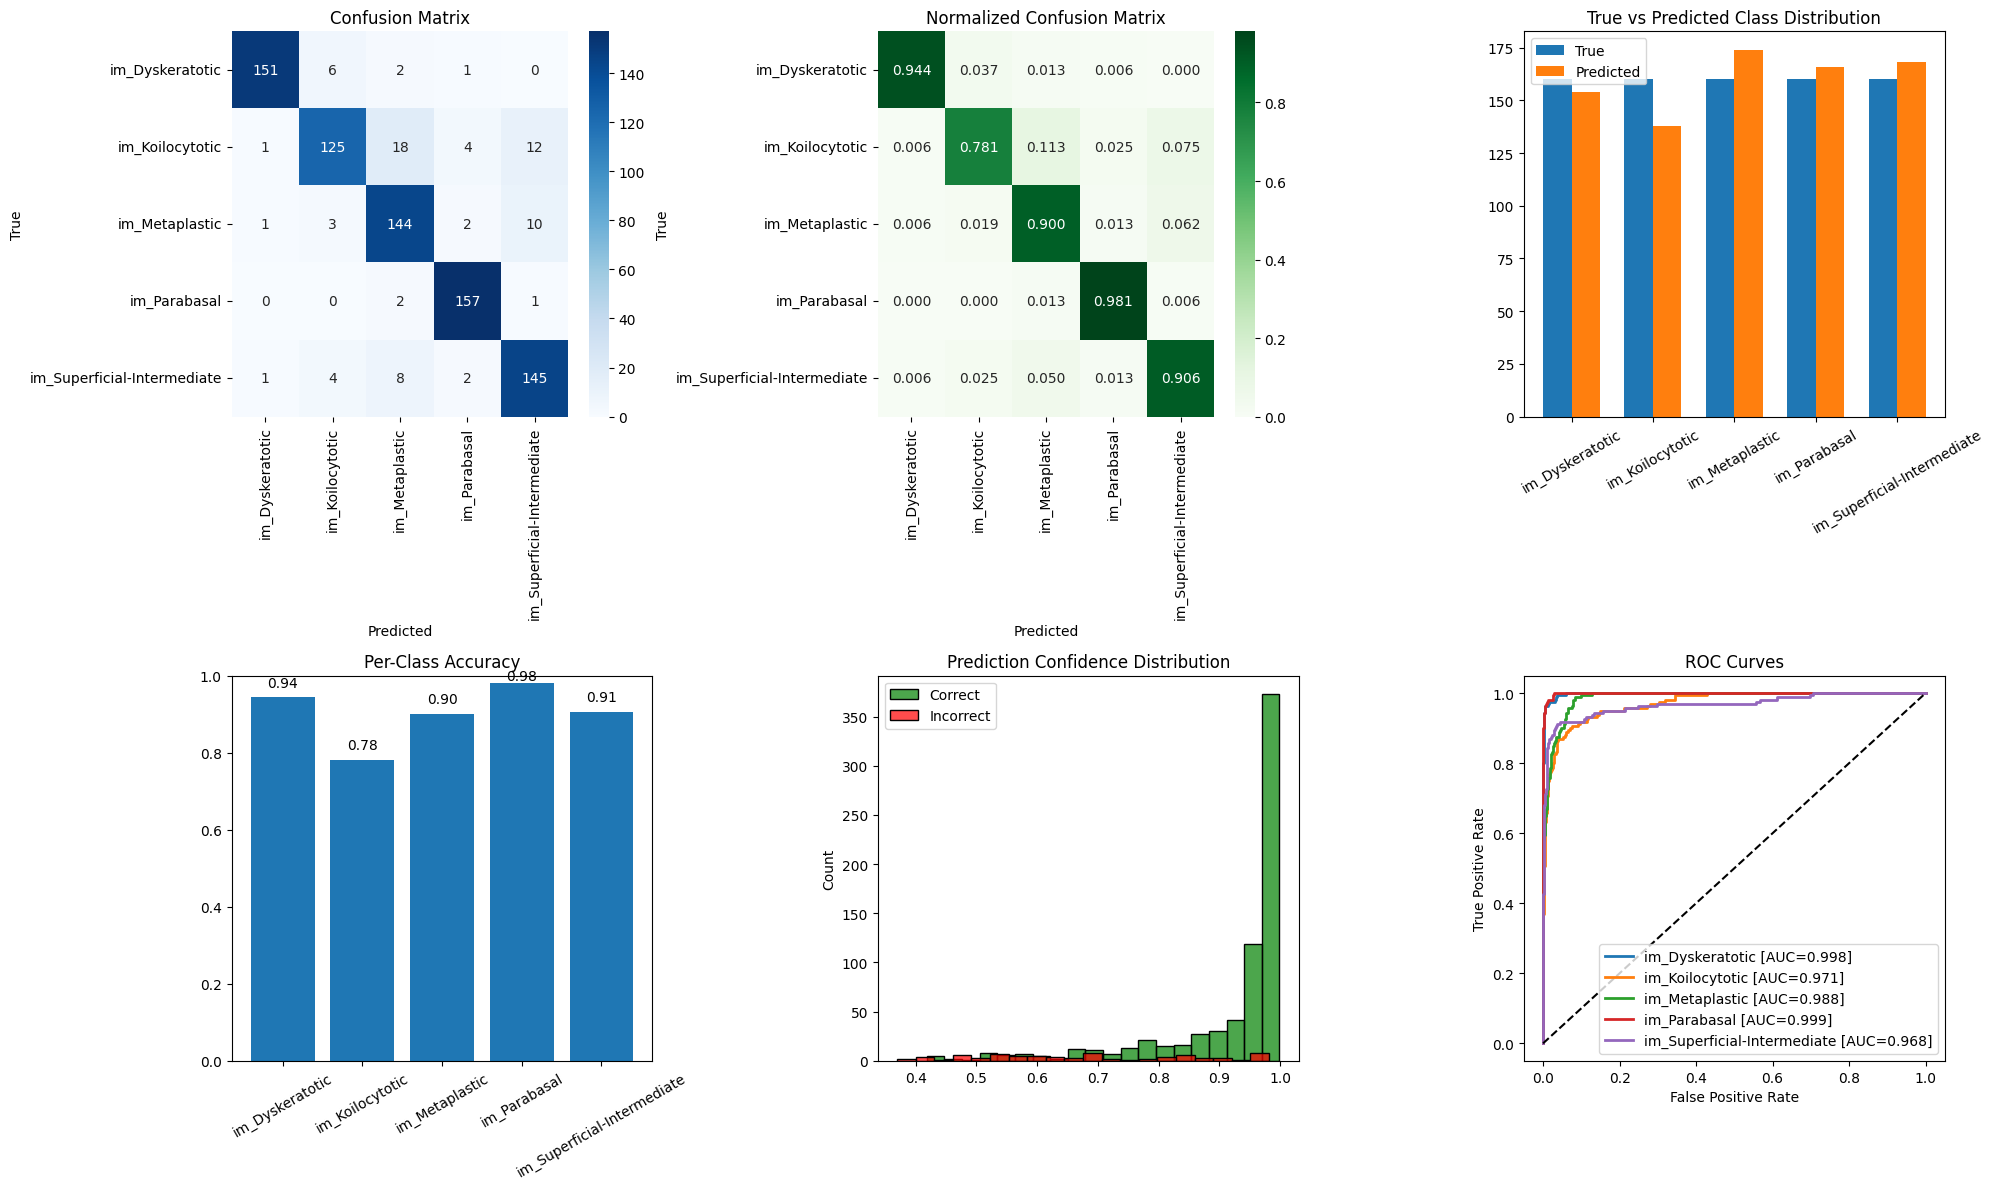


📋 CLASSIFICATION REPORT
                             precision    recall  f1-score   support

            im_Dyskeratotic       0.98      0.94      0.96       160
            im_Koilocytotic       0.91      0.78      0.84       160
             im_Metaplastic       0.83      0.90      0.86       160
               im_Parabasal       0.95      0.98      0.96       160
im_Superficial-Intermediate       0.86      0.91      0.88       160

                   accuracy                           0.90       800
                  macro avg       0.90      0.90      0.90       800
               weighted avg       0.90      0.90      0.90       800


📊 DETAILED METRICS PER CLASS
                      Class  TP  TN  FP  FN Precision Recall F1-Score Specificity
            im_Dyskeratotic 151 637   3   9    0.9805 0.9437   0.9618      0.9953
            im_Koilocytotic 125 627  13  35    0.9058 0.7812   0.8389      0.9797
             im_Metaplastic 144 610  30  16    0.8276 0.9000   0.8623      

<Figure size 640x480 with 0 Axes>

In [8]:
# ==== Ready-from-history evaluation & plots ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import tensorflow as tf
import os

# 0) Pick model from history (model or loaded_model)
mdl = None
if 'model' in globals() and model is not None:
    mdl = model
elif 'loaded_model' in globals() and loaded_model is not None:
    mdl = loaded_model
else:
    raise RuntimeError("No model found. Define `model` or `loaded_model` first.")

if 'val_gen' not in globals():
    raise RuntimeError("`val_gen` not found. Please create your validation generator first.")

# 1) Predict on Validation Data
y_true = val_gen.classes
class_names = list(val_gen.class_indices.keys())

print("🔄 Predicting on validation set ...")
y_pred_probs = mdl.predict(val_gen, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2) Evaluate for overall stats
print("🔄 Evaluating model ...")
val_loss, val_accuracy = mdl.evaluate(val_gen, verbose=0)

# 3) Confusion Matrices
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

# 4) Figure with 6 panels
plt.figure(figsize=(20, 12))

# (a) Raw Confusion Matrix
plt.subplot(2,3,1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix"); plt.ylabel("True"); plt.xlabel("Predicted")

# (b) Normalized Confusion Matrix
plt.subplot(2,3,2)
sns.heatmap(cm_norm, annot=True, fmt=".3f", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix"); plt.ylabel("True"); plt.xlabel("Predicted")

# (c) True vs Predicted Distribution
plt.subplot(2,3,3)
true_counts = np.bincount(y_true, minlength=len(class_names))
pred_counts = np.bincount(y_pred, minlength=len(class_names))
x = np.arange(len(class_names)); width = 0.35
plt.bar(x - width/2, true_counts, width, label="True")
plt.bar(x + width/2, pred_counts, width, label="Predicted")
plt.xticks(x, class_names, rotation=30); plt.legend()
plt.title("True vs Predicted Class Distribution")

# (d) Per-Class Accuracy
plt.subplot(2,3,4)
acc_per_class = cm.diagonal() / cm.sum(axis=1)
bars = plt.bar(class_names, acc_per_class)
plt.ylim(0,1); plt.xticks(rotation=30); plt.title("Per-Class Accuracy")
for b, acc in zip(bars, acc_per_class):
    plt.text(b.get_x()+b.get_width()/2, min(0.98, acc+0.02), f"{acc:.2f}",
             ha="center", va="bottom")

# (e) Prediction Confidence Distribution (using max prob)
plt.subplot(2,3,5)
max_probs = y_pred_probs.max(axis=1)
correct_mask = (y_pred == y_true)
sns.histplot(max_probs[correct_mask], bins=20, alpha=0.7, label="Correct", color="green")
sns.histplot(max_probs[~correct_mask], bins=20, alpha=0.7, label="Incorrect", color="red")
plt.title("Prediction Confidence Distribution"); plt.legend()

# (f) ROC Curves
plt.subplot(2,3,6)
y_true_onehot = tf.keras.utils.to_categorical(y_true, num_classes=len(class_names))
for i, name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, lw=2, label=f"{name} [AUC={auc(fpr,tpr):.3f}]")
plt.plot([0,1],[0,1],'k--'); plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves"); plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 5) Classification report
print("\n" + "="*60)
print("📋 CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred, target_names=class_names))

# 6) Detailed metrics table
print("\n" + "="*70)
print("📊 DETAILED METRICS PER CLASS")
print("="*70)
metrics_data = []
for i, cname in enumerate(class_names):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = (2*precision*recall)/(precision+recall) if (precision+recall)>0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    metrics_data.append({
        "Class": cname, "TP": tp, "TN": tn, "FP": fp, "FN": fn,
        "Precision": f"{precision:.4f}", "Recall": f"{recall:.4f}",
        "F1-Score": f"{f1:.4f}", "Specificity": f"{specificity:.4f}",
    })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))

# 7) Overall stats
print("\n" + "="*50)
print("🎯 OVERALL MODEL STATISTICS")
print("="*50)
print(f"Overall Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"Overall Loss: {val_loss:.4f}")
print(f"Total Samples: {len(y_true)}")
print(f"Correct Predictions: {np.sum(correct_mask)}")
print(f"Incorrect Predictions: {np.sum(~correct_mask)}")

# 8) Confidence summary & low-confidence slice
print("\nPrediction Confidence Statistics:")
print(f"   • Mean:   {np.mean(max_probs):.4f}")
print(f"   • Median: {np.median(max_probs):.4f}")
print(f"   • Min:    {np.min(max_probs):.4f}")
print(f"   • Max:    {np.max(max_probs):.4f}")

low_conf_threshold = 0.70
low_conf_mask = max_probs < low_conf_threshold
if low_conf_mask.any():
    print(f"\n⚠️  Low Confidence (< {low_conf_threshold}):")
    print(f"   • Count: {low_conf_mask.sum()}")
    print(f"   • Percentage: {low_conf_mask.mean()*100:.2f}%")
    print(f"   • Accuracy in this slice: { (correct_mask & low_conf_mask).sum() / low_conf_mask.sum() * 100:.2f}%")
else:
    print("\nNo predictions below the low-confidence threshold.")
    
# 9) (optional) Save the whole figure
os.makedirs("eval_plots", exist_ok=True)
plt.savefig("eval_plots/confusion_metrics_panel.png", dpi=200, bbox_inches="tight")
print("\n🖼️ Saved figure to eval_plots/confusion_metrics_panel.png")


# Hyper tunned QCNN

In [3]:
# ==========================================================
# Pure QCNN (Keras + PennyLane) — FIX to 0.20 val-acc issue
# - Train aug, Val only rescale (no aug)
# - Assert class_indices match
# - LayerNorm after quantum + a bit more regularization
# - Class weights for imbalance
# - RandomSearch over small, fast space (activation/optimizer/lr/heads/qubits)
# ==========================================================

!pip install --quiet keras-tuner pennylane

import os, numpy as np, pandas as pd, tensorflow as tf, pennylane as qml
from tensorflow.keras import Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D,
                                     Dense, Dropout, BatchNormalization, Concatenate, LayerNormalization)
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import keras_tuner as kt

# ---- Safe TF/PennyLane interop ----
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"
tf.config.run_functions_eagerly(True)
try: tf.config.optimizer.set_jit(False)
except: pass
try:
    for g in tf.config.list_physical_devices('GPU'):
        tf.config.experimental.set_memory_growth(g, True)
except: pass

# --------------------------
# Data & knobs
# --------------------------
DATA_DIR   = "/kaggle/working/dataset_subset"
IMG_SIZE   = (160, 160)     # ছোট রাখলে ট্রায়াল দ্রুত
BATCH_SIZE = 32
SEED       = 42
np.random.seed(SEED); tf.random.set_seed(SEED)

MAX_TRIALS   = 20
EPOCHS_TUNE  = 30
EPOCHS_FINAL = 15

# --------------------------
# Generators (IMPORTANT: train aug, val no-aug)
# --------------------------
def make_gens(batch_size=BATCH_SIZE):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15, width_shift_range=0.08, height_shift_range=0.08,
        zoom_range=0.10, horizontal_flip=True,
        validation_split=0.2
    )
    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    tr = train_datagen.flow_from_directory(
        DATA_DIR, target_size=IMG_SIZE, batch_size=batch_size,
        class_mode="categorical", subset="training", shuffle=True, seed=SEED
    )
    va = val_datagen.flow_from_directory(
        DATA_DIR, target_size=IMG_SIZE, batch_size=batch_size,
        class_mode="categorical", subset="validation", shuffle=False, seed=SEED
    )

    print("Train class indices:", tr.class_indices)
    print("Val   class indices:", va.class_indices)
    assert tr.class_indices == va.class_indices, "❌ train/val class_indices mismatch!"
    return tr, va

train_gen, val_gen = make_gens()
NUM_CLASSES = train_gen.num_classes
CLASS_NAMES = list(train_gen.class_indices.keys())

# Class weights (imbalance fix)
cls_w_arr = compute_class_weight(class_weight='balanced',
                                 classes=np.arange(NUM_CLASSES),
                                 y=train_gen.classes)
CLASS_WEIGHTS = dict(enumerate(cls_w_arr))
print("Class weights:", CLASS_WEIGHTS)

# --------------------------
# Tiny separable-CNN backbone
# --------------------------
def build_backbone(act="relu", wd=5e-4, dropout=0.35):
    reg = regularizers.l2(wd)
    inp = Input(shape=(*IMG_SIZE, 3), name="img")
    x = SeparableConv2D(32, 3, padding='same', activation=act,
                        depthwise_regularizer=reg, pointwise_regularizer=reg)(inp)
    x = BatchNormalization()(x); x = MaxPooling2D(2,2)(x)

    x = SeparableConv2D(64, 3, padding='same', activation=act,
                        depthwise_regularizer=reg, pointwise_regularizer=reg)(x)
    x = BatchNormalization()(x); x = MaxPooling2D(2,2)(x)

    x = SeparableConv2D(128, 3, padding='same', activation=act,
                        depthwise_regularizer=reg, pointwise_regularizer=reg)(x)
    x = BatchNormalization()(x); x = MaxPooling2D(2,2)(x)

    pre = GlobalAveragePooling2D(name="gap")(x)
    pre = Dropout(dropout)(pre)
    pre = Dense(64, activation=act, kernel_regularizer=reg, name="pre_64")(pre)
    return inp, pre

# --------------------------
# Quantum layer (expectation)
# --------------------------
from keras.saving import register_keras_serializable

@register_keras_serializable(package="quantum")
class QuantumLayerTF(tf.keras.layers.Layer):
    def __init__(self, n_qubits=4, n_layers=1, **kw):
        super().__init__(**kw)
        self.n_qubits = int(n_qubits); self.n_layers = int(n_layers)
        self.dev = qml.device("default.qubit", wires=self.n_qubits)
        nQ, nL = self.n_qubits, self.n_layers

        @qml.qnode(self.dev, interface="tf", diff_method="parameter-shift")
        def _qnode(inputs, weights):
            for i in range(nQ): qml.RY(inputs[i], wires=i)
            for L in range(nL):
                for i in range(nQ-1): qml.CNOT(wires=[i, i+1])
                for i in range(nQ):    qml.RY(weights[L, i], wires=i)
            return [qml.expval(qml.PauliZ(i)) for i in range(nQ)]
        self.qnode = _qnode

    def build(self, input_shape):
        self.theta = self.add_weight(
            name="weights",
            shape=(self.n_layers, self.n_qubits),
            initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
            trainable=True, dtype=tf.float64
        )

    @tf.autograph.experimental.do_not_convert
    def call(self, inputs):
        inputs64 = tf.cast(inputs, tf.float64) * np.pi
        def _single(x):
            out = self.qnode(x, self.theta)
            return tf.stack(out)
        with tf.device("/CPU:0"):
            y64 = tf.map_fn(
                _single, inputs64,
                fn_output_signature=tf.TensorSpec(shape=(self.n_qubits,), dtype=tf.float64)
            )
        return tf.cast(y64, tf.float32)

    def compute_output_shape(self, input_shape): return (input_shape[0], self.n_qubits)
    def get_config(self): return {**super().get_config(),
                                  "n_qubits": self.n_qubits, "n_layers": self.n_layers}

# --------------------------
# Param space (KerasTuner-safe)
# --------------------------
HEAD_CHOICES = ["64x32", "128x64"]
def parse_pair(s): a,b = s.split("x"); return int(a), int(b)

param_space = {
    "activation":     ["relu", "tanh"],
    "optimizer":      ["adam", "rmsprop"],
    "learning_rate":  [1e-3, 5e-4, 1e-4],
    "n_qubits":       [4, 6],
    "quantum_depth":  [0, 1],         # 0 = encode-only, 1 = one layer
    "head_pair":      HEAD_CHOICES
}

# --------------------------
# Model builder for tuner
# --------------------------
def build_model(hp: kt.HyperParameters):
    act       = hp.Choice('activation',     param_space["activation"])
    opt_name  = hp.Choice('optimizer',      param_space["optimizer"])
    lr        = hp.Choice('learning_rate',  param_space["learning_rate"])
    n_qubits  = hp.Choice('n_qubits',       param_space["n_qubits"])
    q_depth   = hp.Choice('quantum_depth',  param_space["quantum_depth"])
    head_key  = hp.Choice('head_pair',      param_space["head_pair"])
    h1, h2    = parse_pair(head_key)

    inp, pre  = build_backbone(act)

    angles = Dense(n_qubits, activation="tanh", name="to_qubits")(pre)
    qout   = QuantumLayerTF(n_qubits=n_qubits, n_layers=q_depth, name="quantum")(angles)
    qout   = LayerNormalization(name="q_norm")(qout)  # ✅ stabilize quantum outputs

    fused  = Concatenate(name="fuse")([pre, qout])

    h = Dense(h1, activation=act, name="head_1")(fused)
    h = Dropout(0.35)(h)
    h = Dense(h2, activation=act, name="head_2")(h)
    out = Dense(NUM_CLASSES, activation="softmax", name="cls_head")(h)

    model = Model(inp, out, name="qcnn_pure_fusion")

    opt = Adam(lr, clipnorm=1.0) if opt_name=="adam" else RMSprop(lr)
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.03)
    model.compile(optimizer=opt, loss=loss,
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy")],
                  run_eagerly=True, jit_compile=False)
    return model

# --------------------------
# Tuner
# --------------------------
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=MAX_TRIALS,
    directory="/kaggle/working/qcnn_tuning_pure_fix",
    project_name="qcnn_rs_fix",
    overwrite=True
)

cb_tune = [
    EarlyStopping(monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, min_lr=1e-6)
]

tuner.search(
    train_gen, validation_data=val_gen,
    epochs=EPOCHS_TUNE, callbacks=cb_tune,
    class_weight=CLASS_WEIGHTS,
    verbose=1
)

best_hp = tuner.get_best_hyperparameters(1)[0]
print("\n🏆 Best HP:", best_hp.values)

# --------------------------
# Train final with best HP
# --------------------------
best_model = tuner.hypermodel.build(best_hp)
ckpt = "/kaggle/working/qcnn_pure_best_fix.weights.h5"
cb_final = [
    ModelCheckpoint(ckpt, monitor="val_accuracy", save_best_only=True, save_weights_only=True),
    EarlyStopping(monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)
]
hist = best_model.fit(
    train_gen, validation_data=val_gen,
    epochs=EPOCHS_FINAL, callbacks=cb_final,
    class_weight=CLASS_WEIGHTS,
    verbose=1
)
best_model.load_weights(ckpt)

save_path = "/kaggle/working/qcnn_pure_fusion_best_fix.keras"
best_model.save(save_path)
print(f"\n✅ Saved model to: {save_path}")

# Full-val eval + quick collapse check
vl, va = best_model.evaluate(val_gen, verbose=0)
print(f"🎯 Final Val Acc: {va:.4f} | Loss: {vl:.4f}")
pred = np.argmax(best_model.predict(val_gen, verbose=0), axis=1)
uniq, cnt = np.unique(pred, return_counts=True)
print("Pred dist:", dict(zip(uniq, cnt)))


Trial 20 Complete [00h 06m 40s]
val_accuracy: 0.20000000298023224

Best val_accuracy So Far: 0.8075000047683716
Total elapsed time: 03h 41m 11s

🏆 Best HP: {'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.0005, 'n_qubits': 4, 'quantum_depth': 0, 'head_pair': '128x64'}
Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 990ms/step - accuracy: 0.5116 - loss: 1.3386 - val_accuracy: 0.2000 - val_loss: 1.7157 - learning_rate: 5.0000e-04
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 962ms/step - accuracy: 0.7017 - loss: 1.0041 - val_accuracy: 0.2000 - val_loss: 2.4290 - learning_rate: 5.0000e-04
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 967ms/step - accuracy: 0.7472 - loss: 0.8639 - val_accuracy: 0.2438 - val_loss: 2.6824 - learning_rate: 5.0000e-04
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 967ms/step - accuracy: 0.7484 - loss: 0.8514 - val_accuracy: 0.4437 - val_loss: 2.3062 - learning_rate: 2.5000e-04
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 970ms/step - accuracy: 0.7860 - loss:

In [7]:
# ==========================================================
# Export ALL Tuner Trials Results (all hyperparameters + accuracy)
# ==========================================================
import os
import pandas as pd

BASE_OUT = "/kaggle/working"
RUN_DIR  = "/kaggle/working/qcnn_tuning_pure_fix"
PROJ     = "qcnn_rs_fix"

# ---------- (A) Export ALL tuner trials results ----------
def export_all_trials(tuner, out_dir, proj_name):
    oracle = tuner.oracle
    trials = list(oracle.trials.values())

    # Get all values for each trial (all trial params + accuracy + best value)
    rows = []
    for tr in trials:
        row = {"trial_id": tr.trial_id, "status": tr.status, "score": tr.score}
        row.update(tr.hyperparameters.values)  # Add all hyperparameters as columns
        for m in tr.metrics.metrics.keys():
            # Fetch the best value of each recorded metric
            try:
                row[f"best_{m}"] = tr.metrics.get_best_value(m)
            except Exception:
                row[f"best_{m}"] = None
        rows.append(row)

    df_all_trials = pd.DataFrame(rows)

    # Save the complete summary of all trials (Trial parameters and accuracy)
    out_base = os.path.join(out_dir, proj_name)
    os.makedirs(out_base, exist_ok=True)
    all_trials_csv = os.path.join(out_base, "all_tuner_trials.csv")
    df_all_trials.to_csv(all_trials_csv, index=False)

    print(f"✅ All trials CSV saved: {all_trials_csv}")
    
    # Show the top few rows for the user
    print("\nTop 5 Trials (with Accuracy and Hyperparameters):")
    print(df_all_trials.head(20))
    
    return df_all_trials

# Execute export for all tuner trials
df_all_trials = export_all_trials(tuner, RUN_DIR, PROJ)

# ---------- (B) Save Best Hyperparameters as CSV ----------
best_hp = tuner.get_best_hyperparameters(1)[0]
best_hp_csv = os.path.join(BASE_OUT, "best_hyperparameters.csv")
pd.DataFrame([best_hp.values]).to_csv(best_hp_csv, index=False)
print(f"✅ Best hyperparameters CSV saved: {best_hp_csv}")

# Show best hyperparameters
print("\n🏆 Best Hyperparameters:")
for k, v in best_hp.values.items():
    print(f" - {k}: {v}")


✅ All trials CSV saved: /kaggle/working/qcnn_tuning_pure_fix/qcnn_rs_fix/all_tuner_trials.csv

Top 5 Trials (with Accuracy and Hyperparameters):
   trial_id     status    score activation optimizer  learning_rate  n_qubits  \
0        00  COMPLETED  0.20000       tanh      adam         0.0010         6   
1        01  COMPLETED  0.20000       relu      adam         0.0005         4   
2        02  COMPLETED  0.20000       tanh   rmsprop         0.0010         6   
3        03  COMPLETED  0.20000       tanh   rmsprop         0.0005         4   
4        04  COMPLETED  0.20000       relu   rmsprop         0.0005         4   
5        05  COMPLETED  0.20000       relu      adam         0.0001         4   
6        06  COMPLETED  0.20000       tanh   rmsprop         0.0010         4   
7        07  COMPLETED  0.20000       relu   rmsprop         0.0010         4   
8        08  COMPLETED  0.20000       relu      adam         0.0005         4   
9        09  COMPLETED  0.80750       tanh   

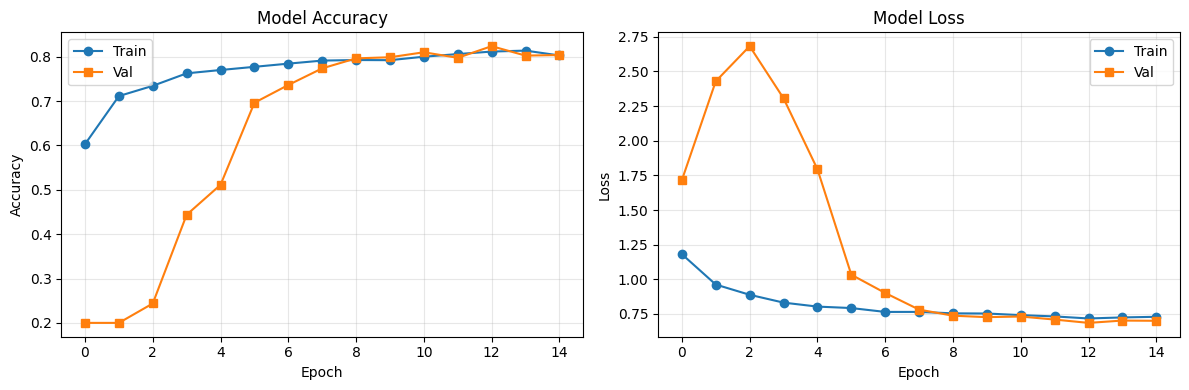

✅ Saved figure to /kaggle/working/training_plots4.png


In [8]:
# ==== Plot training curves from the History object ====
import matplotlib.pyplot as plt

# 1) History dict নাও
H = hist.history  # <- THIS is the right one

# 2) keys ঠিক করো (আমরা metric name="accuracy" দিয়েছি, তাই 'accuracy' থাকবে)
acc_key = "accuracy" if "accuracy" in H else (
    "categorical_accuracy" if "categorical_accuracy" in H else None
)
val_acc_key = f"val_{acc_key}" if acc_key and f"val_{acc_key}" in H else None

plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
if acc_key:
    plt.plot(H[acc_key], marker='o', label='Train')
    if val_acc_key:
        plt.plot(H[val_acc_key], marker='s', label='Val')
    plt.title('Model Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.grid(True, alpha=0.3); plt.legend()
else:
    plt.text(0.5,0.5,"No accuracy key found in history", ha='center'); plt.axis('off')

# Loss plot
plt.subplot(1,2,2)
if "loss" in H:     plt.plot(H["loss"], marker='o', label='Train')
if "val_loss" in H: plt.plot(H["val_loss"], marker='s', label='Val')
plt.title('Model Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.grid(True, alpha=0.3); plt.legend()

plt.tight_layout()
plt.savefig('/kaggle/working/training_plots4.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved figure to /kaggle/working/training_plots4.png")


🔄 Building validation generator...
Found 800 images belonging to 5 classes.
✅ Classes: ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
🔄 Loading QCNN model...
✅ Loaded: /kaggle/working/qcnn_pure_fusion_best_fix.keras

🔍 Evaluating...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


📊 Val Accuracy: 0.8238 | Val Loss: 0.6859

🔮 Predicting on validation set...

📋 CLASSIFICATION REPORT
                             precision    recall  f1-score   support

            im_Dyskeratotic     0.9226    0.8938    0.9079       160
            im_Koilocytotic     0.7708    0.6937    0.7303       160
             im_Metaplastic     0.7322    0.8375    0.7813       160
               im_Parabasal     0.9212    0.9500    0.9354       160
im_Superficial-Intermediate     0.7778    0.7438    0.7604       160

                   accuracy                         0.8237       800
                  macro avg     0.8249    0.8238    0.8231       800
               weighted avg     0.8249    0.8237    0.8231       800



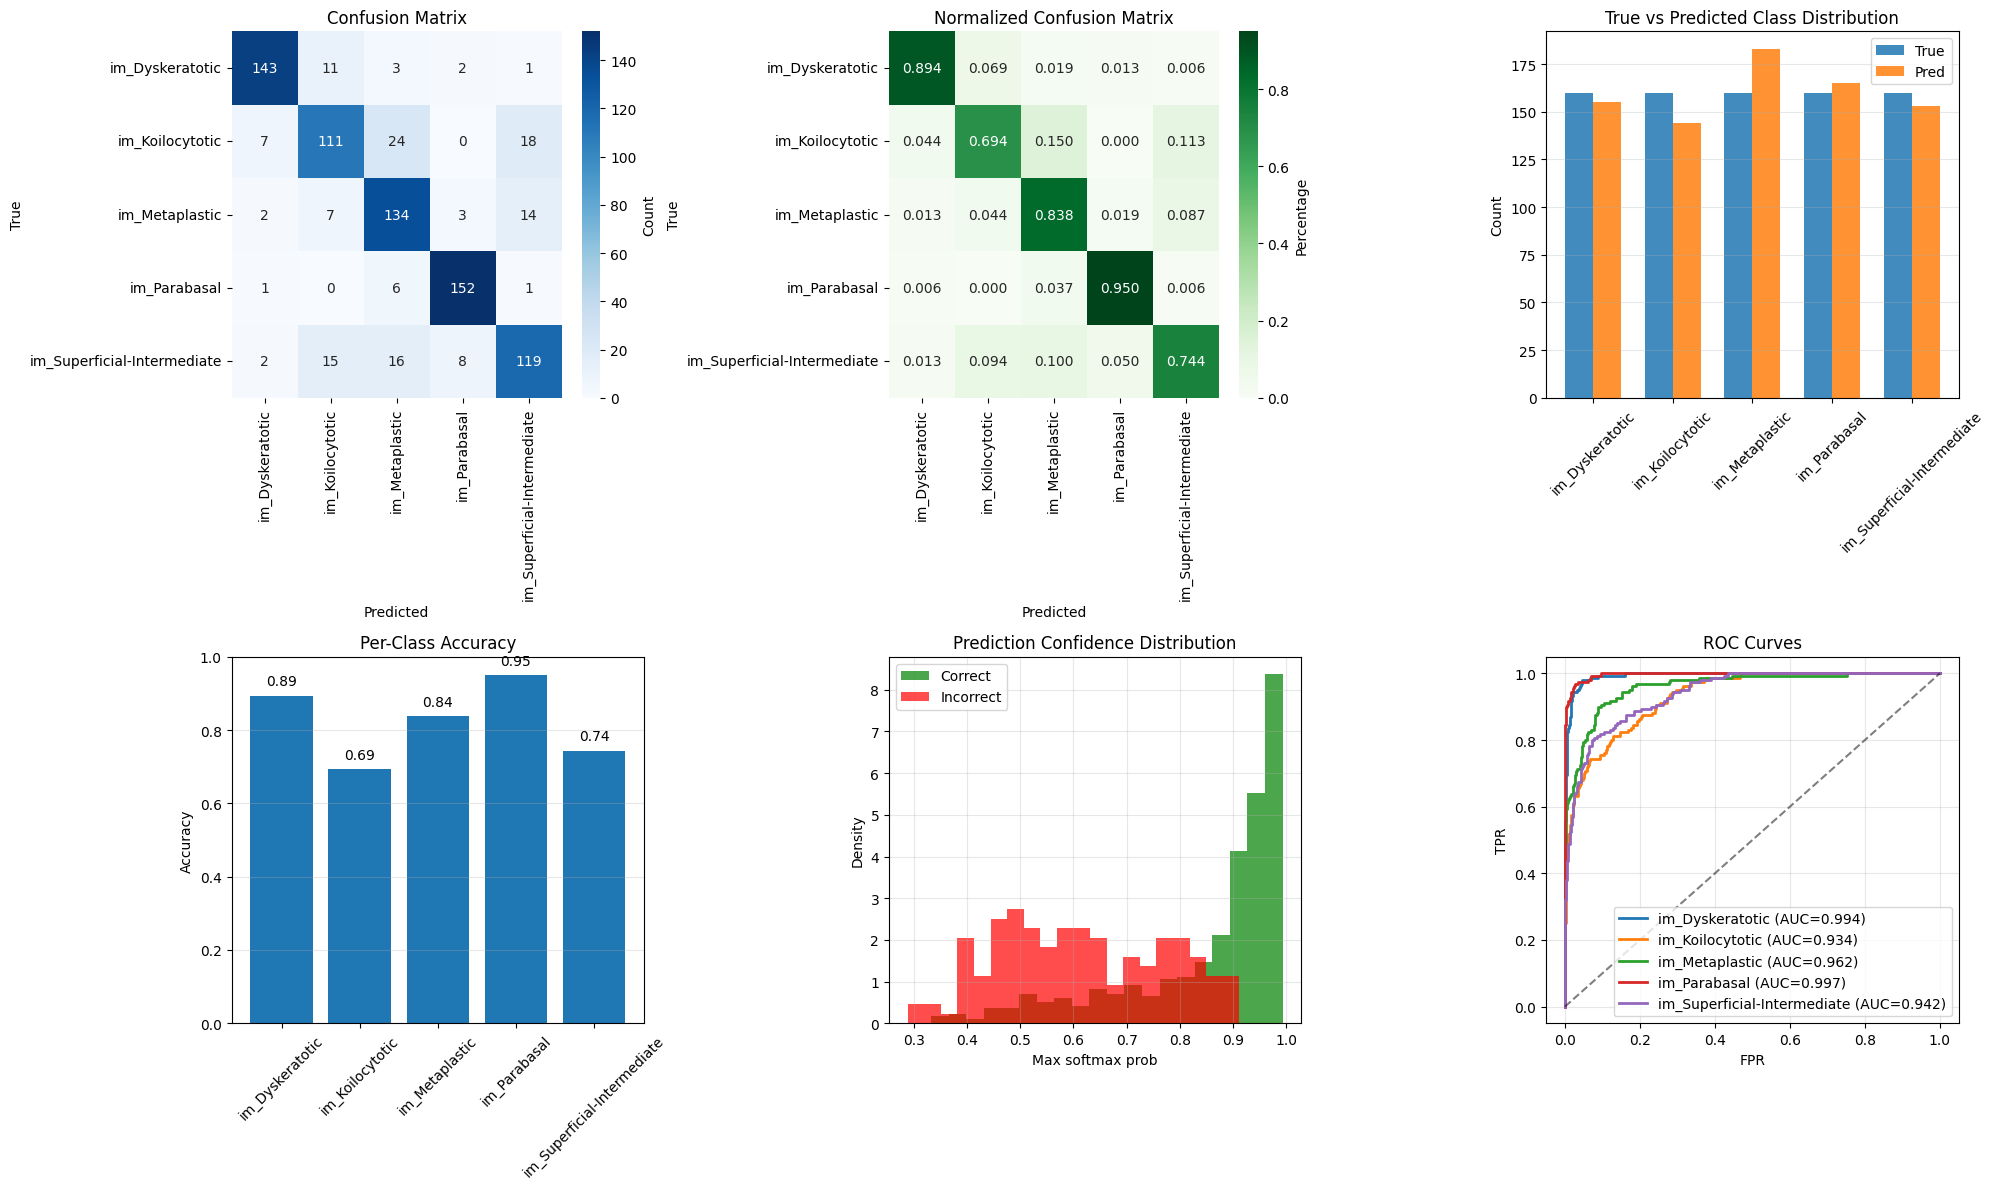

🖼️ Saved panel to: /kaggle/working/qcnn_eval_panel.png

🎯 OVERALL MODEL STATISTICS
Val Accuracy: 0.8238 (82.38%)
Val Loss    : 0.6859
Total Samples: 800
Correct Preds: 659
Incorrect    : 141

Confidence: mean=0.8120 | median=0.8925 | min=0.2887 | max=0.9928


In [9]:
# ==================== QCNN: Full Evaluation + Diagrams ====================
import os, numpy as np, pandas as pd, tensorflow as tf, pennylane as qml
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Safe TF/PennyLane interop (avoid XLA issues) ----
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"
tf.config.run_functions_eagerly(True)
try: tf.config.optimizer.set_jit(False)
except: pass

# --------------------------
# 1) Define QuantumLayerTF (must match training-time layer)
# --------------------------
from keras.saving import register_keras_serializable

@register_keras_serializable(package="quantum")
class QuantumLayerTF(tf.keras.layers.Layer):
    """Expectation-only quantum layer (eager-safe, CPU)."""
    def __init__(self, n_qubits=4, n_layers=1, **kw):
        super().__init__(**kw)
        self.n_qubits = int(n_qubits); self.n_layers = int(n_layers)
        self.dev = qml.device("default.qubit", wires=self.n_qubits)
        nQ, nL = self.n_qubits, self.n_layers

        @qml.qnode(self.dev, interface="tf", diff_method="parameter-shift")
        def _qnode(inputs, weights):
            for i in range(nQ): qml.RY(inputs[i], wires=i)
            for L in range(nL):
                for i in range(nQ-1): qml.CNOT(wires=[i, i+1])
                for i in range(nQ):    qml.RY(weights[L, i], wires=i)
            return [qml.expval(qml.PauliZ(i)) for i in range(nQ)]
        self.qnode = _qnode

    def build(self, input_shape):
        self.theta = self.add_weight(
            name="weights",
            shape=(self.n_layers, self.n_qubits),
            initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
            trainable=True, dtype=tf.float64
        )

    @tf.autograph.experimental.do_not_convert
    def call(self, inputs):
        inputs64 = tf.cast(inputs, tf.float64) * np.pi
        def _single(x):
            out = self.qnode(x, self.theta)
            return tf.stack(out)
        with tf.device("/CPU:0"):
            y64 = tf.map_fn(
                _single, inputs64,
                fn_output_signature=tf.TensorSpec(shape=(self.n_qubits,), dtype=tf.float64)
            )
        return tf.cast(y64, tf.float32)

    def compute_output_shape(self, input_shape): return (input_shape[0], self.n_qubits)
    def get_config(self): return {**super().get_config(),
                                  "n_qubits": self.n_qubits, "n_layers": self.n_layers}

# --------------------------
# 2) Paths & Data
# --------------------------
model_path = "/kaggle/working/qcnn_pure_fusion_best_fix.keras"  # <-- আপনার QCNN model path দিন
data_dir   = "/kaggle/working/dataset_subset"
IMG_SIZE   = (160, 160)  # ট্রেনিংয়ের সময় যেটা ছিল সেটাই দিন (224 হলে 224 দিন)
BATCH_SIZE = 32
SEED = 42

print("🔄 Building validation generator...")
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_gen = val_datagen.flow_from_directory(
    data_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation', shuffle=False, seed=SEED
)
class_names = list(val_gen.class_indices.keys())
print("✅ Classes:", class_names)

# --------------------------
# 3) Load model
# --------------------------
print("🔄 Loading QCNN model...")
loaded_model = tf.keras.models.load_model(
    model_path,
    custom_objects={"QuantumLayerTF": QuantumLayerTF}
)
print(f"✅ Loaded: {model_path}")

# --------------------------
# 4) Evaluate + predictions
# --------------------------
print("\n🔍 Evaluating...")
val_loss, val_acc = loaded_model.evaluate(val_gen, verbose=0)
print(f"📊 Val Accuracy: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

print("\n🔮 Predicting on validation set...")
val_gen.reset()
y_prob = loaded_model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(y_prob, axis=1)
max_probs = np.max(y_prob, axis=1)
correct_mask = (y_true == y_pred)

print("\n" + "="*50)
print("📋 CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# --------------------------
# 5) Plots: CM, Norm CM, Dist, Per-class Acc, Confidence, ROC
# --------------------------
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig = plt.figure(figsize=(20,12))

# 1) Confusion Matrix
plt.subplot(2,3,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label':'Count'})
plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('True')

# 2) Normalized CM
plt.subplot(2,3,2)
sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label':'Percentage'})
plt.title('Normalized Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('True')

# 3) Class distribution (true vs pred)
plt.subplot(2,3,3)
true_counts = np.bincount(y_true, minlength=len(class_names))
pred_counts = np.bincount(y_pred, minlength=len(class_names))
x = np.arange(len(class_names)); w = 0.35
plt.bar(x - w/2, true_counts, w, label='True', alpha=0.85)
plt.bar(x + w/2, pred_counts, w, label='Pred', alpha=0.85)
plt.xticks(x, class_names, rotation=45); plt.legend()
plt.title('True vs Predicted Class Distribution'); plt.ylabel('Count'); plt.grid(axis='y', alpha=0.3)

# 4) Per-class accuracy
plt.subplot(2,3,4)
per_cls_acc = []
for i in range(len(class_names)):
    mask = (y_true == i)
    acc_i = (np.sum((y_true==i) & (y_pred==i)) / np.sum(mask)) if np.sum(mask)>0 else 0.0
    per_cls_acc.append(acc_i)
bars = plt.bar(class_names, per_cls_acc)
plt.ylim(0,1); plt.xticks(rotation=45); plt.ylabel('Accuracy'); plt.title('Per-Class Accuracy'); plt.grid(axis='y', alpha=0.3)
for b,a in zip(bars, per_cls_acc):
    plt.text(b.get_x()+b.get_width()/2, min(0.98,a+0.02), f"{a:.2f}", ha='center', va='bottom')

# 5) Confidence distribution
plt.subplot(2,3,5)
plt.hist(max_probs[correct_mask], bins=20, alpha=0.7, label='Correct', color='green', density=True)
plt.hist(max_probs[~correct_mask], bins=20, alpha=0.7, label='Incorrect', color='red', density=True)
plt.title('Prediction Confidence Distribution'); plt.xlabel('Max softmax prob'); plt.ylabel('Density'); plt.legend(); plt.grid(alpha=0.3)

# 6) ROC curves
plt.subplot(2,3,6)
if len(class_names) == 2:
    fpr, tpr, _ = roc_curve(y_true, y_prob[:,1])
    plt.plot(fpr, tpr, lw=2, label=f"AUC={auc(fpr,tpr):.3f}")
else:
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    for i, name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curves'); plt.legend(loc='lower right'); plt.grid(alpha=0.3)

plt.tight_layout()
panel_path = "/kaggle/working/qcnn_eval_panel.png"
plt.savefig(panel_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"🖼️ Saved panel to: {panel_path}")

# --------------------------
# 6) Extra overall stats
# --------------------------
print("\n" + "="*50)
print("🎯 OVERALL MODEL STATISTICS")
print("="*50)
print(f"Val Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
print(f"Val Loss    : {val_loss:.4f}")
print(f"Total Samples: {len(y_true)}")
print(f"Correct Preds: {np.sum(y_true==y_pred)}")
print(f"Incorrect    : {np.sum(y_true!=y_pred)}")
print(f"\nConfidence: mean={np.mean(max_probs):.4f} | median={np.median(max_probs):.4f} | min={np.min(max_probs):.4f} | max={np.max(max_probs):.4f}")
